# 📈 Modelling 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Loading the training and test sets

In [2]:
# Load the datasets
train_data = pd.read_csv("dataset/mitbih_train_cleaned.csv")
test_data = pd.read_csv("dataset/mitbih_test_cleaned.csv")

In [3]:
print("Training data shape: {}\n".format(train_data.shape))
train_data.head()

Training data shape: (87554, 188)



,0.0ms,2.78ms,5.56ms,8.33ms,11.11ms,13.89ms,16.67ms,19.44ms,22.22ms,25.0ms,...,494.44ms,497.22ms,500.0ms,502.78ms,505.56ms,508.33ms,511.11ms,513.89ms,516.67ms,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [4]:
print("Test data shape: {}\n".format(test_data.shape))
test_data.head()

Test data shape: (21892, 188)



,0.0ms,2.78ms,5.56ms,8.33ms,11.11ms,13.89ms,16.67ms,19.44ms,22.22ms,25.0ms,...,494.44ms,497.22ms,500.0ms,502.78ms,505.56ms,508.33ms,511.11ms,513.89ms,516.67ms,Label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


### Separating features and labels

In [5]:
X_train = train_data.drop(columns=["Label"])
y_train = train_data["Label"]
X_test = test_data.drop(columns=["Label"])
y_test = test_data["Label"]

In [6]:
y_test.value_counts()

Label
Normal              18118
Unknown              1608
Ventricular          1448
Supraventricular      556
Fusion                162
Name: count, dtype: int64

### Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

In [7]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# Check the class distribution after SMOTE
print(y_train.value_counts())

Label
Normal              72471
Supraventricular    72471
Ventricular         72471
Fusion              72471
Unknown             72471
Name: count, dtype: int64


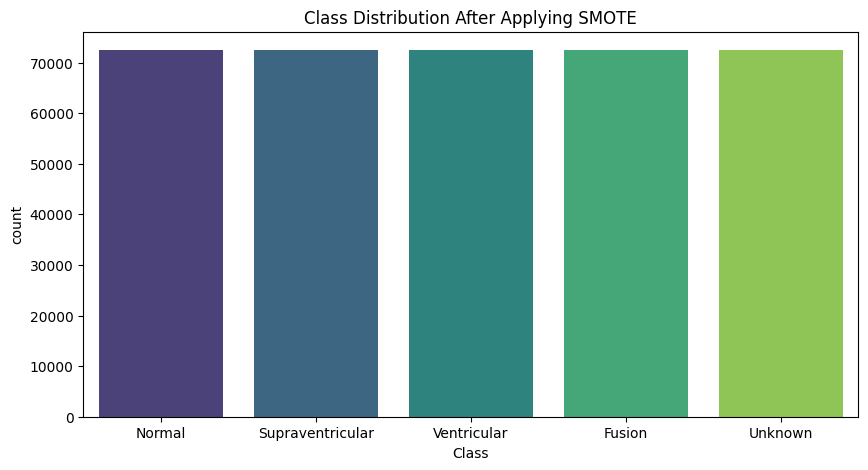

In [9]:
# Visualizing the class distribution after SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, hue=y_train, palette="viridis")
plt.title("Class Distribution After Applying SMOTE")
plt.xlabel("Class")
plt.savefig("plots/class_distribution_after_smote.png")
plt.show()

In [ ]:
# # Visualizing the similarity between original and resampled data using t-sne
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=42)
# X_train_tsne = tsne.fit_transform(X_train_resampled)
# # Plotting the t-SNE results
# sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train_resampled, palette="Set1")
# plt.title("t-SNE Visualization of Resampled Data")

# plt.show()

### Encoding the labels in both training and test sets

In [10]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [11]:
# Encoding the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [13]:
# Checking the encoded labels
class_mapping = {}
for i, cls in enumerate(encoder.classes_):
    class_mapping[cls] = i

print(class_mapping)

{'Fusion': 0, 'Normal': 1, 'Supraventricular': 2, 'Unknown': 3, 'Ventricular': 4}


In [14]:
# Save the encoder
with open("encoders/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

## Model: Logistic Regression

### Model Training 

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}\n")

Accuracy: 0.673



In [17]:
report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print("Classification Report:\n")
print(report)

Classification Report:

                  precision    recall  f1-score   support

          Fusion       0.08      0.86      0.15       162
          Normal       0.97      0.65      0.78     18118
Supraventricular       0.15      0.67      0.24       556
         Unknown       0.72      0.92      0.81      1608
     Ventricular       0.29      0.72      0.41      1448

        accuracy                           0.67     21892
       macro avg       0.44      0.76      0.48     21892
    weighted avg       0.88      0.67      0.74     21892



In [18]:
# Saving the model
with open("models/logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

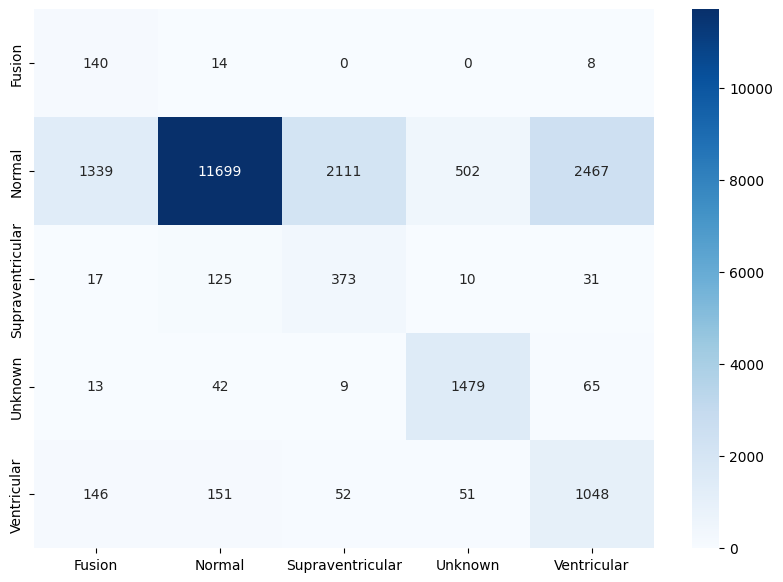

In [23]:
# Confusion matrix for the model predictions
lr_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

## Model: Decision Tree

###  Model Training

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier(criterion="entropy", random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Model Evaluation

In [26]:
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree:.3f}\n")

report_dtree = classification_report(y_test, y_pred_dtree)
print(report_dtree)

Decision Tree Accuracy: 0.942

              precision    recall  f1-score   support

           0       0.46      0.70      0.55       162
           1       0.98      0.95      0.97     18118
           2       0.49      0.74      0.59       556
           3       0.93      0.96      0.94      1608
           4       0.81      0.91      0.86      1448

    accuracy                           0.94     21892
   macro avg       0.73      0.85      0.78     21892
weighted avg       0.95      0.94      0.95     21892



In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

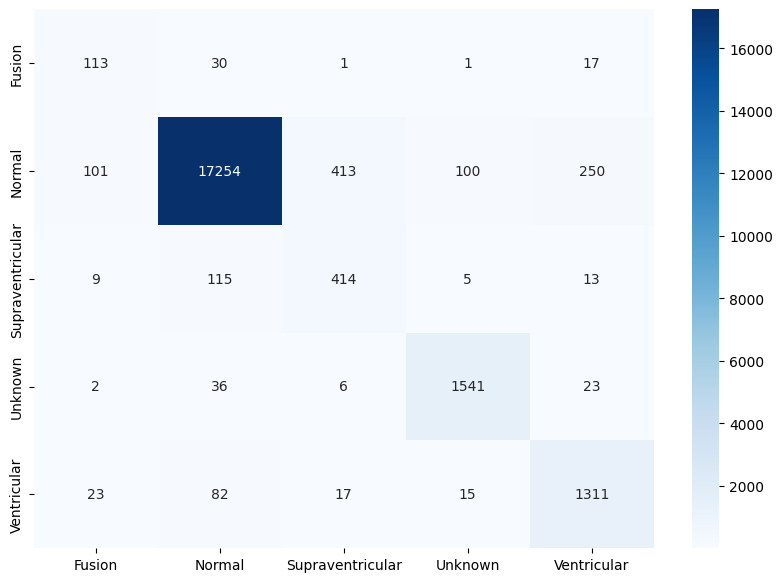

In [30]:
# Confusion matrix for the model predictions
dt_matrix = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(10, 7))
sns.heatmap(dt_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

## Model: Random Forest

### Model Training

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=15, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

### Model Evaluation

In [33]:
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Accuracy: {accuracy_rfc:.3f}\n")

report_rfc = classification_report(y_test, y_pred_rfc, target_names=encoder.classes_)
print(report_rfc)

Random Forest Accuracy: 0.978

                  precision    recall  f1-score   support

          Fusion       0.76      0.73      0.75       162
          Normal       0.98      0.99      0.99     18118
Supraventricular       0.82      0.76      0.79       556
         Unknown       0.99      0.97      0.98      1608
     Ventricular       0.96      0.93      0.94      1448

        accuracy                           0.98     21892
       macro avg       0.90      0.88      0.89     21892
    weighted avg       0.98      0.98      0.98     21892



In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

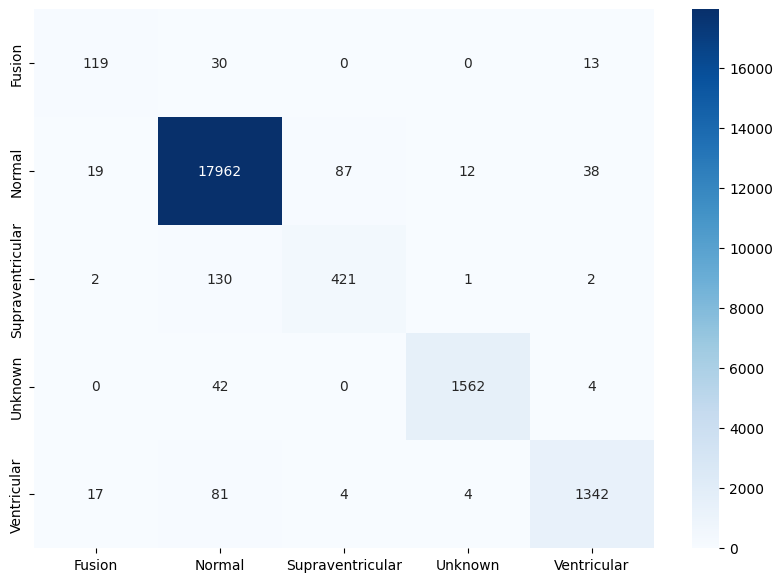

In [35]:
# Confusion matrix for the model predictions
rfc_matrix = confusion_matrix(y_test ,y_pred_rfc)
plt.figure(figsize=(10, 7))
sns.heatmap(rfc_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

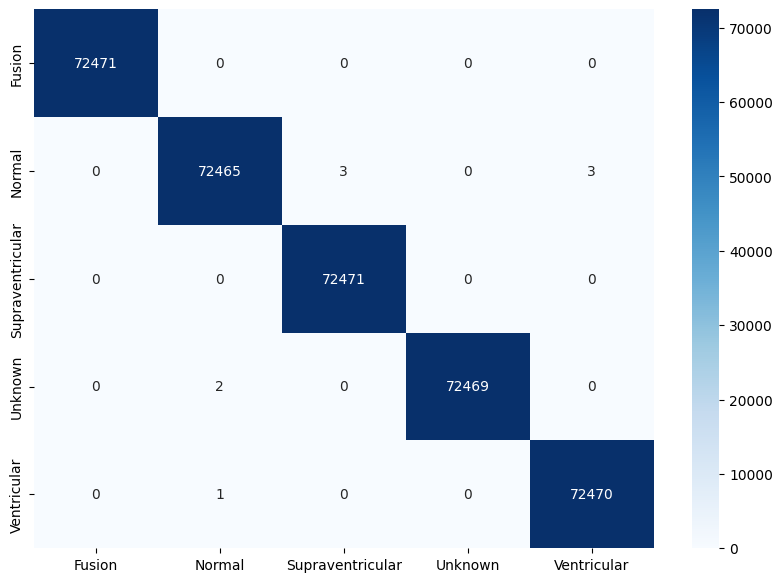

In [36]:
# Confusion matrix for the model predictions
rfc_tmatrix = confusion_matrix(y_train, rfc.predict(X_train))
plt.figure(figsize=(10, 7))
sns.heatmap(rfc_tmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()